In [ ]:
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import scipy as sp
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.neural_network
import sklearn.model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings

In [ ]:
#Load datasets
data1 = pd.read_csv('MLEARN_2022_train_top20_shots.csv', header=0)
data2 = pd.read_csv('MLEARN_2022_test_top20_shots.csv', header=0)

#Select features
data1=data1.drop(['GAME_CLOCK','PLAYER','DEFENDER','PLAYER_HEIGHT','DEFENDER_HEIGHT','PLAYER_AGE','DEFENDER_AGE','PLAYER_WEIGHT',
                  'DEFENDER_WEIGHT','PLAYER_EXPERIENCE','DEFENDER_EXPERIENCE'], axis=1)
data1.set_index('ID', inplace=True)

data2=data2.drop(['GAME_CLOCK','PLAYER','DEFENDER','PLAYER_HEIGHT','DEFENDER_HEIGHT','PLAYER_AGE','DEFENDER_AGE','PLAYER_WEIGHT',
                  'DEFENDER_WEIGHT','PLAYER_EXPERIENCE','DEFENDER_EXPERIENCE'], axis=1)
predictions_id=data2['ID'].tolist()
data2.set_index('ID', inplace=True)

predictions = pd.DataFrame(columns=['ID','SHOT_RESULT'])
predictions['ID']=predictions_id

data1.head
data2.head

<bound method NDFrame.head of        PERIOD  GAME_CLOCK_SECONDS  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  \
ID                                                                    
6707        1               688.0        13.2         0         0.7   
5071        1               332.0        17.6         0         0.8   
10611       2               317.0        13.0         2         2.9   
2489        3               563.0        20.8         2         2.0   
3420        1               293.0        21.8         3         2.6   
...       ...                 ...         ...       ...         ...   
17619       2               474.0        13.5         0         2.0   
8730        2                 4.0         3.0         0         1.0   
745         4               549.0         9.9         1         1.4   
6623        4               474.0         2.8         4         4.6   
13018       4                37.0        24.0         0         0.6   

       SHOT_DIST  PTS_TYPE  CLOSE_DEF_DIST  PL

In [ ]:
#Split X data and y labels
X_train = data1.drop('SHOT_RESULT', axis=1)
y_train = data1['SHOT_RESULT']
X_test = data2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2367ebf70>]],
      dtype=object)

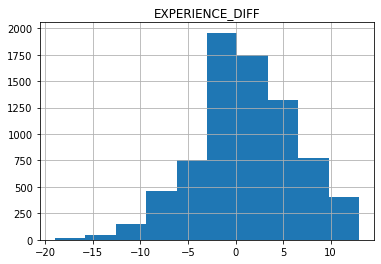

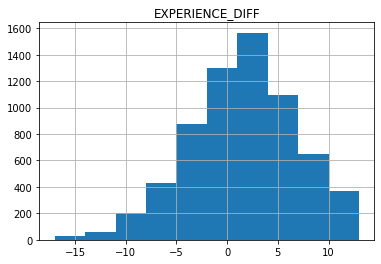

In [ ]:
class1 = data1[data1['SHOT_RESULT'] == 0]
class2 = data1[data1['SHOT_RESULT'] == 1]

class1.hist(column="EXPERIENCE_DIFF")
class2.hist(column="EXPERIENCE_DIFF")

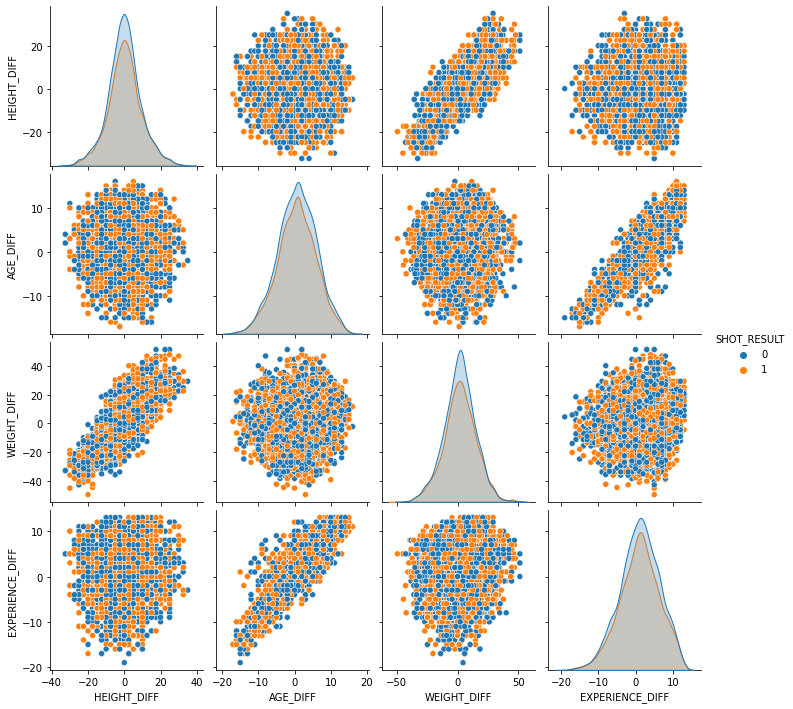

In [ ]:
# scatter plot shuffled data
sns.pairplot(data1.iloc[:,-5:],hue='SHOT_RESULT');
plt.draw()

In [ ]:
dim_reducer = LinearDiscriminantAnalysis(n_components=1)

**USING NEURAL NETWORKS**

In [ ]:
model2 = sklearn.pipeline.Pipeline([
    ("scaling", sklearn.preprocessing.MinMaxScaler()),
    ('reduce_dim', dim_reducer),
    ("clf", sklearn.neural_network.MLPClassifier(solver='adam',alpha=0,hidden_layer_sizes=(134,),activation='relu',max_iter=1000))
])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV

cv_type = KFold(n_splits=5, shuffle=True, random_state=1)
learning_rate_init = [0.001, 0.00131]

grid_search1 = GridSearchCV(estimator = model2,
                              param_grid={"clf__learning_rate_init": learning_rate_init},
                              cv=cv_type, return_train_score=True)

grid_search1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaling', MinMaxScaler()),
                                       ('reduce_dim',
                                        LinearDiscriminantAnalysis(n_components=1)),
                                       ('clf',
                                        MLPClassifier(alpha=0,
                                                      hidden_layer_sizes=(134,),
                                                      max_iter=1000))]),
             param_grid={'clf__learning_rate_init': [0.001, 0.00131]},
             return_train_score=True)

In [ ]:
print(grid_search1.best_params_)

{'clf__learning_rate_init': 0.00131}


In [ ]:
pred_train2 = grid_search1.predict(X_train)

train_error = 1. - accuracy_score(y_train, pred_train2)
train_cmat = confusion_matrix(y_train, pred_train2)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)

print("TRAINING\n" + classification_report(y_train, pred_train2))

train error: 0.385547 
train confusion matrix:
[[6319 1307]
 [4167 2405]]
TRAINING
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      7626
           1       0.65      0.37      0.47      6572

    accuracy                           0.61     14198
   macro avg       0.63      0.60      0.58     14198
weighted avg       0.62      0.61      0.59     14198



**USING SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

model3 = Pipeline([
    ('center', StandardScaler()),
    ('reduce_dim', dim_reducer),
    ('clf', SVC(kernel="rbf"))
])

Cs = [23,24,25]
gammas = [1e-4,2e-4]

grid_search2 = GridSearchCV(model3,
                           param_grid={"clf__C": Cs, "clf__gamma": gammas},
                           cv=StratifiedShuffleSplit(n_splits=1, train_size=0.75,random_state=2),
                           return_train_score=True, scoring='f1')

grid_search2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=2, test_size=None,
            train_size=0.75),
             estimator=Pipeline(steps=[('center', StandardScaler()),
                                       ('reduce_dim',
                                        LinearDiscriminantAnalysis(n_components=1)),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [23, 24, 25],
                         'clf__gamma': [0.0001, 0.0002]},
             return_train_score=True, scoring='f1')

In [ ]:
print(grid_search2.best_params_)

{'clf__C': 24, 'clf__gamma': 0.0001}


In [ ]:
pred_train = grid_search2.predict(X_train)

train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)

print("TRAINING\n" + classification_report(y_train, pred_train))

train error: 0.394774 
train confusion matrix:
[[5547 2079]
 [3526 3046]]
TRAINING
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      7626
           1       0.59      0.46      0.52      6572

    accuracy                           0.61     14198
   macro avg       0.60      0.60      0.59     14198
weighted avg       0.60      0.61      0.60     14198



**USING RANDOM FORESTS**

In [ ]:
import sklearn.ensemble

model3 = sklearn.pipeline.Pipeline([
    ("scaling", sklearn.preprocessing.MinMaxScaler()),
    ('reduce_dim', dim_reducer),
    ("clf", sklearn.ensemble.RandomForestClassifier(criterion='entropy', random_state=1))
])

n_estimators=[73,74,75]
min_samples_leaf=[6,7]

cv_type = KFold(n_splits=5, shuffle=True, random_state=1)

grid_search3 = GridSearchCV(estimator = model3,
                              param_grid={"clf__n_estimators": n_estimators,
                                          "clf__min_samples_leaf": min_samples_leaf},
                              cv=cv_type, return_train_score=True)

grid_search3.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('scaling', MinMaxScaler()),
                                       ('reduce_dim',
                                        LinearDiscriminantAnalysis(n_components=1)),
                                       ('clf',
                                        RandomForestClassifier(criterion='entropy',
                                                               random_state=1))]),
             param_grid={'clf__min_samples_leaf': [6, 7],
                         'clf__n_estimators': [73, 74, 75]},
             return_train_score=True)

In [ ]:
print(grid_search3.best_params_)

{'clf__min_samples_leaf': 7, 'clf__n_estimators': 75}


In [ ]:
pred_train = grid_search3.predict(X_train)
pred_test = grid_search3.predict(X_test)

train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print("TRAINING\n" + classification_report(y_train, pred_train))

train error: 0.279124 
train confusion matrix:
[[6063 1563]
 [2400 4172]]
TRAINING
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      7626
           1       0.73      0.63      0.68      6572

    accuracy                           0.72     14198
   macro avg       0.72      0.71      0.72     14198
weighted avg       0.72      0.72      0.72     14198




**USING ENSEMBLE**






In [ ]:
from sklearn.ensemble import VotingClassifier

mlp_clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(135,),alpha=0,learning_rate_init=0.00131,random_state=40)
svm_clf = SVC(C=24,gamma=0.0001,kernel="rbf",random_state=40,probability=True)
rnd_clf = sklearn.ensemble.RandomForestClassifier(criterion='entropy', ccp_alpha=0,min_samples_leaf=7, n_estimators=75,random_state=40)

voting_sclf = VotingClassifier(
    estimators=[('mlp', mlp_clf), ('svc', svm_clf),('rnd', rnd_clf)],
    voting='soft')

voting_sclf.fit(X_train, y_train)

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0, hidden_layer_sizes=(135,),
                                            learning_rate_init=0.00131,
                                            random_state=40)),
                             ('svc',
                              SVC(C=24, gamma=0.0001, probability=True,
                                  random_state=40)),
                             ('rnd',
                              RandomForestClassifier(ccp_alpha=0,
                                                     criterion='entropy',
                                                     min_samples_leaf=7,
                                                     n_estimators=75,
                                                     random_state=40))],
                 voting='soft')

In [ ]:
pred_train = voting_sclf.predict(X_train)
pred_test = voting_sclf.predict(X_test)

train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print("TRAINING\n" + classification_report(y_train, pred_train))

train error: 0.242288 
train confusion matrix:
[[5495 2131]
 [1309 5263]]
TRAINING
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      7626
           1       0.71      0.80      0.75      6572

    accuracy                           0.76     14198
   macro avg       0.76      0.76      0.76     14198
weighted avg       0.76      0.76      0.76     14198



In [ ]:
predictions['SHOT_RESULT'] = pred_test
predictions.head

predictions.to_csv('predictions.csv', index=False)
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>